In [1]:
import umap
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [16]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

# y = np.array([0 for _ in range(150)])
y.shape

(150,)

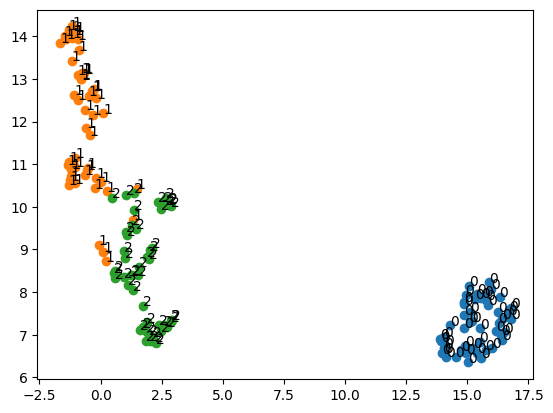

In [50]:
# 次元削減する
mapper = umap.UMAP(random_state=0, n_neighbors=15, metric="cosine") # cos類似度で次元削減も可能
embedding = mapper.fit_transform(X)

# 結果を二次元でプロットする
embedding_x = embedding[:, 0]
embedding_y = embedding[:, 1]
for n in np.unique(y):
    plt.scatter(
        embedding_x[y == n],
        embedding_y[y == n],
        label=n,
    )

# グラフを表示する
# plt.grid()
# plt.legend()

# https://python-academia.com/matplotlib-scatter/
for i, label in enumerate(y):
    plt.text(embedding_x[i], embedding_y[i],label)

plt.show()

In [51]:
# クラスタリング（クラスラベルは一旦置いておくとして
from sklearn.cluster import KMeans

In [54]:
k = 3
SEED = 42

# 2次元空間でのk-means
kmeans_model = KMeans(n_clusters=k, random_state=SEED).fit(embedding)
# 高次元空間でのk-means
kmeans_model = KMeans(n_clusters=k, random_state=SEED).fit(X)

labels = kmeans_model.labels_
labels

C:\Users\licht\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

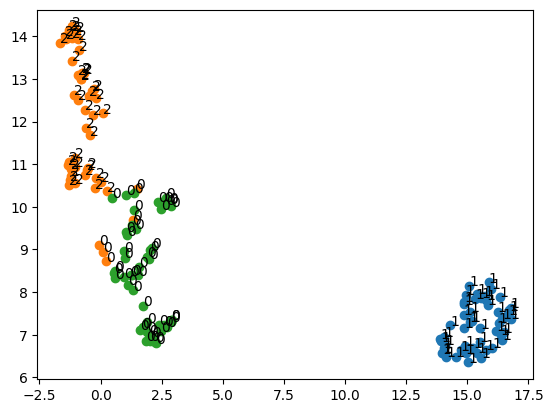

In [55]:
# K-meansの精度を見る
mapper = umap.UMAP(random_state=0, n_neighbors=15, metric="cosine") # cos類似度で次元削減も可能
embedding = mapper.fit_transform(X)

embedding_x = embedding[:, 0]
embedding_y = embedding[:, 1]
for n in np.unique(y):
    plt.scatter(
        embedding_x[y == n],
        embedding_y[y == n],
        label=n,
    )


for i, label in enumerate(labels):
    plt.text(embedding_x[i], embedding_y[i],label)

plt.show()

In [56]:
# DataFrameにして出力
import pandas as pd

In [65]:
df_cluster = pd.DataFrame(columns=["cls", "data"])
for cls, x in zip(labels, X):
    data = (",").join([str(x_i) for x_i in x])
    df_x = pd.DataFrame([[cls, data]], columns=["cls", "data"])
    df_cluster = pd.concat([df_cluster, df_x], ignore_index=True)

df_cluster

,cls,data
0,1,"5.1,3.5,1.4,0.2"
1,1,"4.9,3.0,1.4,0.2"
2,1,"4.7,3.2,1.3,0.2"
3,1,"4.6,3.1,1.5,0.2"
4,1,"5.0,3.6,1.4,0.2"
...,...,...
145,0,"6.7,3.0,5.2,2.3"
146,0,"6.3,2.5,5.0,1.9"
147,0,"6.5,3.0,5.2,2.0"
148,0,"6.2,3.4,5.4,2.3"
